<a href="https://colab.research.google.com/github/ardaedil/Image-Classifier/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Binary Classification
### Creating a Binary Classifier with ResNet

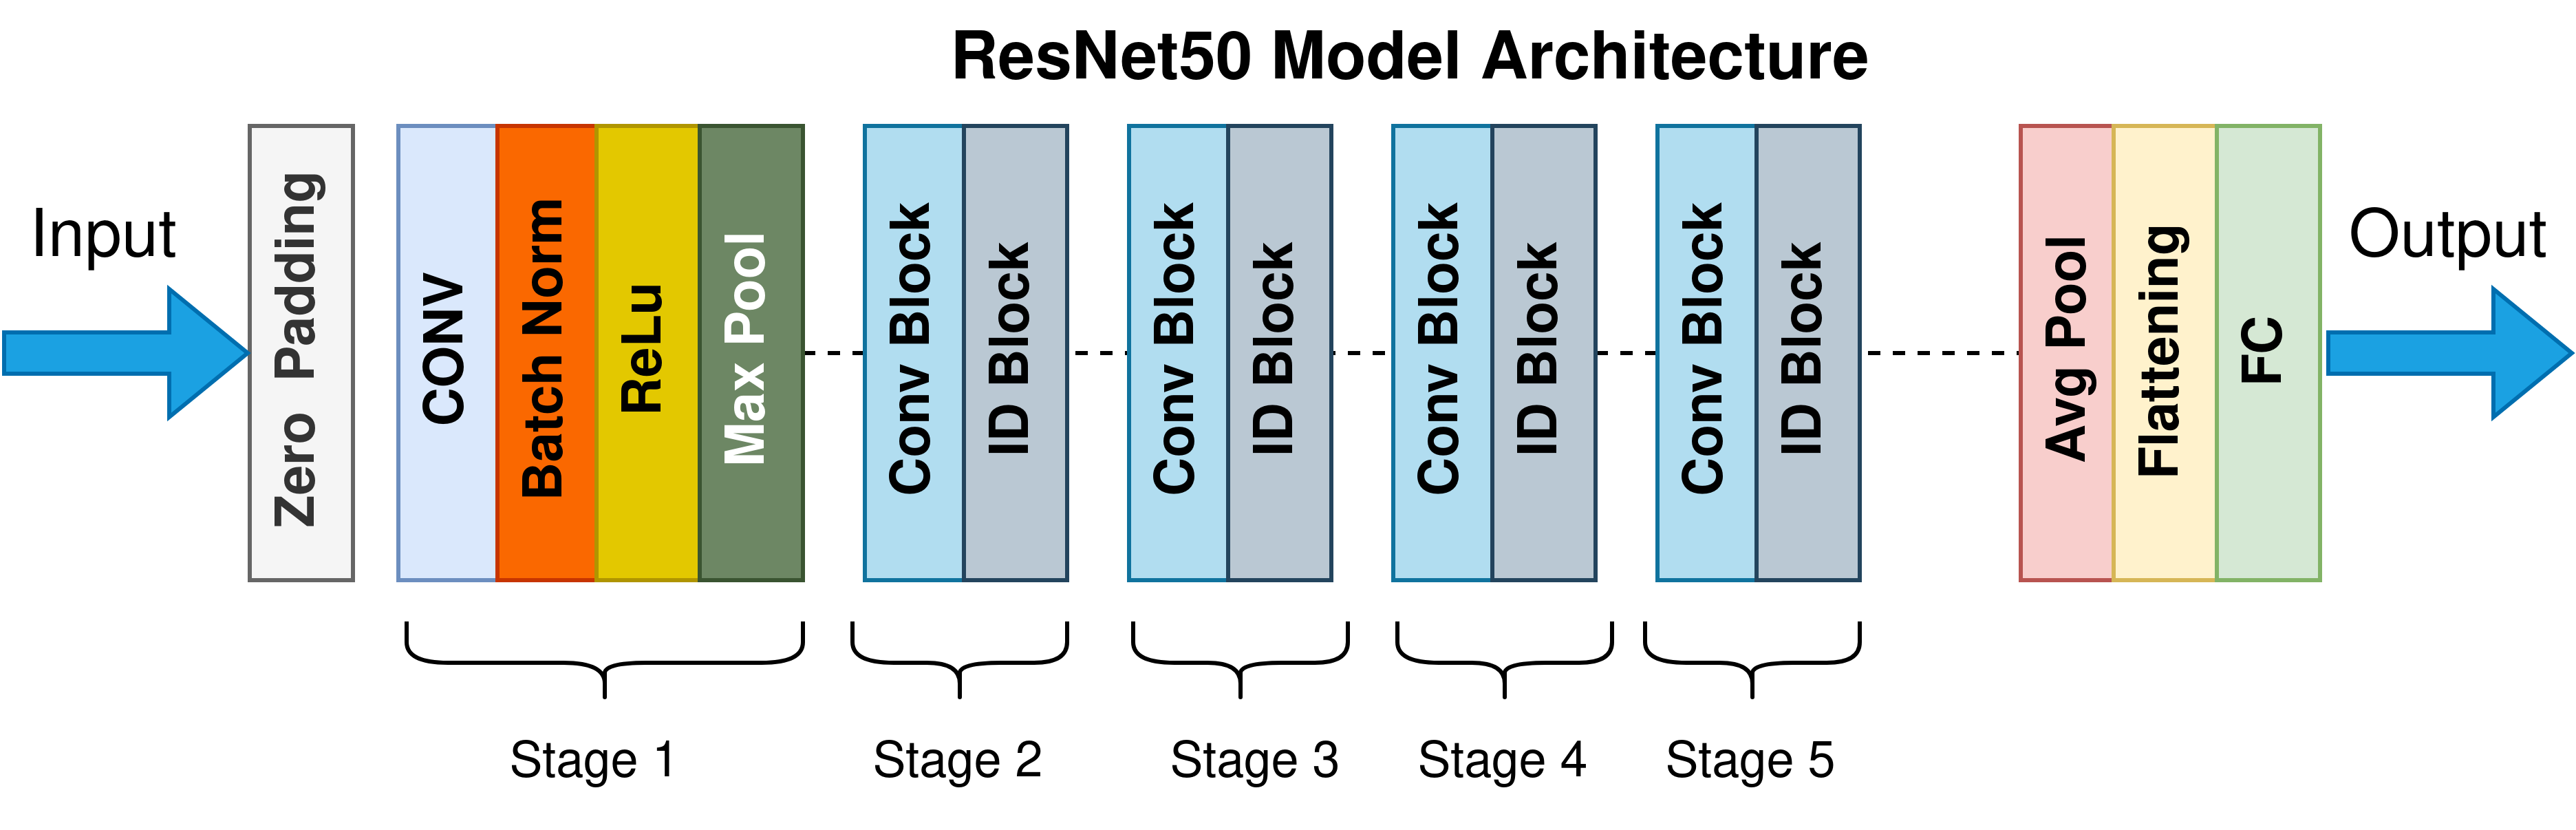

In [ ]:
!pip install -Uqq fastai duckduckgo_search

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
Mounted at /content/drive


In this notebook, you will build a classifier that distinguishes between different pictures of two types of things.

In the following cell, you can decide which two objects you'd like to build a classifer for. For example, you might put:

- class_A = "cat"
- class_B = "dog"

In [ ]:
class_A = "cat" # Your code here
class_B = "dog" # Your code here

In [ ]:
x = 5

In [ ]:
x + 1

6

In [ ]:
x = 6

## Step 1: Create dataset

First, we must download and organize a dataset. Let's do it ourselves, by connecting to DuckDuckGo and grabbing images of class_A and class_B.

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30): # Returns urls
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'cat'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


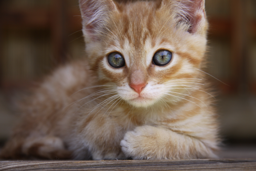

In [ ]:
# View an image of class A

urls = search_images(class_A) # Your code here - hint: use the search_images function defined above

from fastdownload import download_url
dest = f"{class_A}.jpg"
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
urls

(#30) ['https://get.pxhere.com/photo/animal-pet-kitten-cat-small-mammal-fauna-heal-blue-eye-close-up-nose-whiskers-vertebrate-domestic-lying-tabby-cat-norwegian-forest-cat-ginger-fur-small-to-medium-sized-cats-cat-like-mammal-carnivoran-domestic-short-haired-cat-domestic-long-haired-cat-609263.jpg','https://wallpaperaccess.com/full/275808.jpg','http://www.jedicraftgirl.com/wp-content/uploads/2015/01/bengal-kitten-7.jpg','https://novacatclinic.com/wp-content/uploads/2019/03/IMG_8668.jpg','http://www.photosdaily.com/wp-content/uploads/2012/12/Happy-Cat.jpg','https://welovecatsandkittens.com/wp-content/uploads/2017/05/cute.jpg','https://theawesomedaily.com/wp-content/uploads/2017/03/pictures-of-stray-cats-7-1.jpg','https://www.ovrs.com/blog/wp-content/uploads/2014/12/iStock_000029861698_Medium-1.jpg','https://www.thesprucepets.com/thmb/st2K40YnRkWUc3P_01lHYzflk7s=/3558x2363/filters:no_upscale():max_bytes(150000):strip_icc()/Cat-rolling-GettyImages-165893132-58ac5ef05f9b58a3c90a144f.jpg','

In [ ]:
urls

(#30) ['https://get.pxhere.com/photo/animal-pet-kitten-cat-small-mammal-fauna-heal-blue-eye-close-up-nose-whiskers-vertebrate-domestic-lying-tabby-cat-norwegian-forest-cat-ginger-fur-small-to-medium-sized-cats-cat-like-mammal-carnivoran-domestic-short-haired-cat-domestic-long-haired-cat-609263.jpg','https://wallpaperaccess.com/full/275808.jpg','http://www.jedicraftgirl.com/wp-content/uploads/2015/01/bengal-kitten-7.jpg','https://novacatclinic.com/wp-content/uploads/2019/03/IMG_8668.jpg','https://welovecatsandkittens.com/wp-content/uploads/2017/05/cute.jpg','http://www.photosdaily.com/wp-content/uploads/2012/12/Happy-Cat.jpg','http://upload.wikimedia.org/wikipedia/commons/d/d4/Cat_March_2010-1a.jpg','https://wallpaperaccess.com/full/275902.jpg','https://theawesomedaily.com/wp-content/uploads/2017/03/pictures-of-stray-cats-7-1.jpg','https://www.thesprucepets.com/thmb/st2K40YnRkWUc3P_01lHYzflk7s=/3558x2363/filters:no_upscale():max_bytes(150000):strip_icc()/Cat-rolling-GettyImages-16589313

In [ ]:
from fastdownload import download_url
from fastai.vision.all import *


Searching for 'dog'


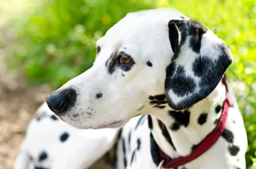

In [ ]:
# View an image of class B

urls2 = search_images(class_B) # Your code here - hint: use the search_images function defined above
dest2 = f"{class_B}.jpg"
download_url(urls2[0], dest2, show_progress=False)
im = Image.open(dest2)
im.to_thumb(256,256)

In machine learning, we often work with very large datasets. For now, let's have 100 images of class A and 100 images of class B.

It is also often common for data to be partitioned into different groups:
- **training data**: used to train the model; is always the largest group
- **validation data**: used during training to validate the model; comes from the same source as training data
- **test data**: used after training to test the model; often can come from a different source from the training data

Depending on the size of your entire dataset, the amount of data in each group may vary. For small datasets such as this one, a split of 80% training data and 20% test data is normal.

Note: later, the model will automatically separate the validation from the training data, so don't worry about that for now.

In [ ]:

searches = [class_A, class_B] # Your code here - fill in the blanks; this should be a 2-element list of your two search queries
train_path = Path('train_data')
test_path = Path('test_data')
from time import sleep

for o in searches:
    train_dest = (train_path/o)
    test_dest = (test_path/o)
    train_dest.mkdir(exist_ok=True, parents=True)
    test_dest.mkdir(exist_ok=True, parents=True)
    image_urls = search_images(f'{o} photo', max_images=90)
    download_images(train_dest, urls=image_urls[:72]) # Your code here - fill in the blank; use list comprehension to get 80%
    download_images(test_dest, urls=image_urls[72:]) # Your code here - fill in the blank; use list comprehension to get 20%
    resize_images(train_path/o, max_size=400, dest=train_path/o)
    resize_images(test_path/o, max_size=400, dest=test_path/o)

# Removes the photos that did not download correctly
failed = verify_images(get_image_files(train_path))
failed.map(Path.unlink)
failed = verify_images(get_image_files(test_path))
failed.map(Path.unlink)

print("Download Complete")


Searching for 'cat photo'
Searching for 'dog photo'
Download Complete


## Step 2: Train our model

What are each of the following parameters? Try to look online for documentation!

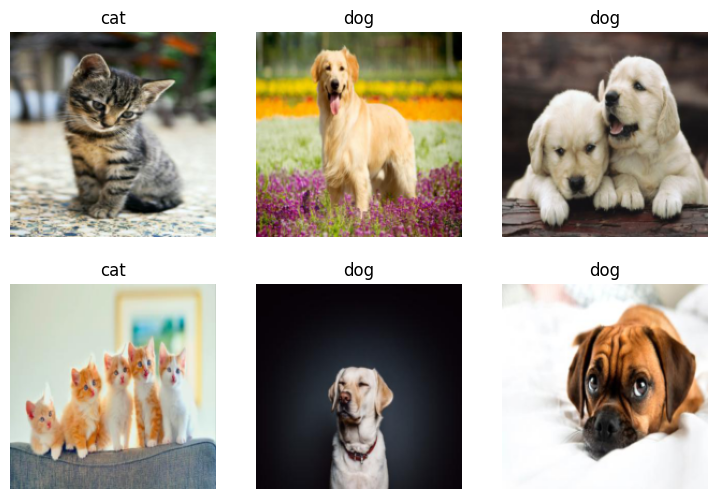

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(train_path, bs=32)

dls.show_batch(max_n=6)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 208MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.028954,0.348850,0.076923,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.307268,0.090017,0.076923,00:02
1,0.254050,0.032864,0.000000,00:03
2,0.188820,0.019609,0.000000,00:01
3,0.148433,0.016903,0.000000,00:00
4,0.126948,0.013081,0.000000,00:00
5,0.103362,0.009243,0.000000,00:01
6,0.086391,0.006166,0.000000,00:00
7,0.077234,0.006088,0.000000,00:00
8,0.066586,0.005726,0.000000,00:00
9,0.059766,0.009907,0.000000,00:00


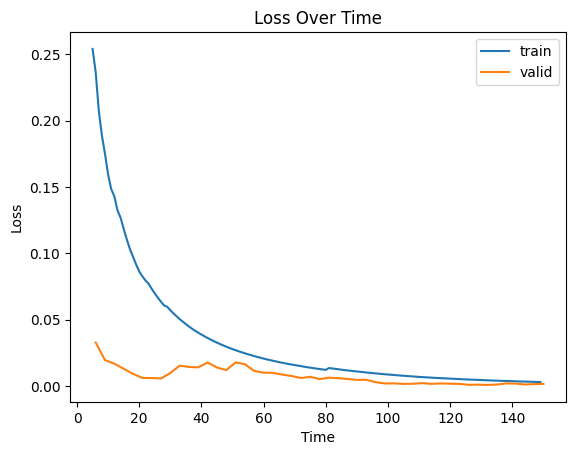

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
recorder = learn.recorder
learn.fine_tune(50)
recorder.plot_loss()
plt.xlabel("Time")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()
plt.show()

You might notice that the loss doesn't always go down. Keep that in mind for later.

## Step 3: Use our model

Now that we've trained our model, it's time to test it on some data its never seen before. First, let's look at how it does on an example from class_A and class_B

This is a: cat.
Probability it's class A: 1.0000


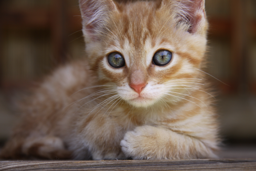

In [ ]:
# Trying out the model on new data

is_ClassA,_,probs = learn.predict(PILImage.create(f'{class_A}.jpg'))
print(f"This is a: {is_ClassA}.")
print(f"Probability it's class A: {probs[0]:.4f}") # Your code here - fill in the blank; hint: what is the index of the output probability corresponding to class_A
im = Image.open(f"{class_A}.jpg")
im.to_thumb(256,256)

This is a: dog.
Probability it's class B: 1.0000


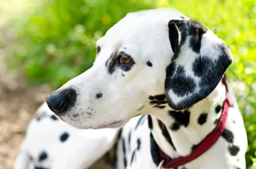

In [ ]:
# Trying out the model on new data

is_ClassB,_,probs = learn.predict(PILImage.create(f'{class_B}.jpg'))
print(f"This is a: {is_ClassB}.")
print(f"Probability it's class B: {probs[1]:.4f}") # Your code here - fill in the blank; hint: what is the index of the output probability corresponding to class_A
im = Image.open(f"{class_B}.jpg")
im.to_thumb(256,256)

Great! Now, in order to measure how well our model has learned class_A and class_B, let's test it on our entire test set.

In the following cell, A_predictions and B_predictions are output tensors, ran on the test set containing images of A and images of B respectively. The entries of A_predictions and B_predictions are the output probabilities of the model on each of the inputs. Try printing them to get a better understanding. Calculate three things given these tensors:

1. Accuracy of class_A predictions
2. Accuracy of class_B predictions
3. Total accuracy

In [ ]:
A_test = glob.glob(os.path.join(f"test_data/{class_A}", '*'))
B_test = glob.glob(os.path.join(f"test_data/{class_B}", '*'))

A_dl = dls.test_dl(A_test, with_labels=False)
A_predictions, _ = learn.get_preds(dl=A_dl)
B_dl = dls.test_dl(B_test, with_labels=False)
B_predictions, _ = learn.get_preds(dl=B_dl)

A_accuracy = (sum(A_predictions[:, 0] > A_predictions[:, 1]) / len(A_predictions)).item() # Your code here
print("Accuracy when predicting class_A:", A_accuracy)

B_accuracy = (sum(B_predictions[:, 0] < B_predictions[:, 1]) / len(B_predictions)).item() # Your code here
print("Accuracy when predicting class_B:", B_accuracy)

Total_accuracy = (A_accuracy * len(A_predictions) + B_accuracy * len(B_predictions)) / (len(A_predictions) + len(B_predictions)) # Your code here - hint: take a weighted average
print("Total accuracy:", Total_accuracy)

Accuracy when predicting class_A: 1.0
Accuracy when predicting class_B: 0.9375
Total accuracy: 0.9705882352941176


In [ ]:
A_predictions

tensor([[1.0000e+00, 2.9379e-06],
        [8.9619e-01, 1.0381e-01],
        [1.0000e+00, 3.4154e-07],
        [9.9597e-01, 4.0311e-03],
        [9.9999e-01, 7.6792e-06],
        [1.0000e+00, 2.6509e-07],
        [1.0000e+00, 2.7724e-07],
        [8.9333e-01, 1.0667e-01],
        [1.0000e+00, 1.0970e-07],
        [9.9991e-01, 9.4823e-05],
        [9.9999e-01, 6.3534e-06],
        [1.0000e+00, 1.2777e-09],
        [9.9077e-01, 9.2339e-03],
        [5.4309e-01, 4.5691e-01],
        [9.9999e-01, 1.3394e-05],
        [1.0000e+00, 2.1246e-07],
        [9.9987e-01, 1.3150e-04],
        [9.9999e-01, 5.0339e-06]])

## Step 3: Experiment

There are many other things you can try in building a classifier. Here are a few ideas, but you can definitely think of many more:

- Look into how training for different amounts of time affects the loss and accuracy
- Try different architectures (such as squeezenet1_0, alexnet, vgg16_bn, resnet50, etc.)
- Use the same procedure but with different classes (you may have to delete your previous data if attempting this however; you can use !rm -r /FILEPATH to do so, but be careful!)

#### Citations

Jeremy Howard, Kaggle